In [11]:
from datos import obtenerCapacitancia, obtenerFrecuencia, obtenerInductancia, obtenerResistencias, obtenerVoltaje
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches




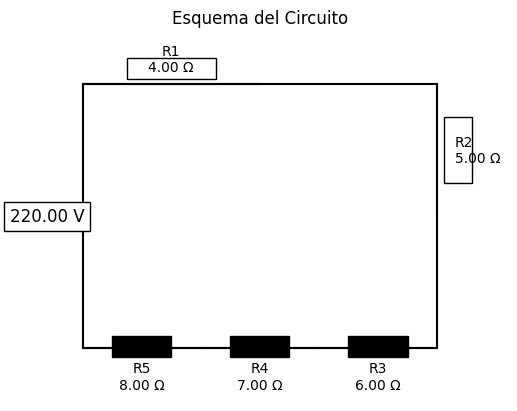

In [48]:
fig, ax = plt.subplots()
voltaje=220
resistencias=[4,5,6,7,8]
serie=True
rlc=False
XL=None
XC=None
   

componentes = resistencias
if rlc:
    resistenciaTotal = suma_Resistencia(resistencias, serie)
    componentes = [resistenciaTotal, XL, XC]
    nombres = ['R', 'RL', 'RC']
else:
    nombres = ['R' + str(i + 1) for i in range(len(resistencias))]

if serie:
        num_componentes = len(componentes)
        tercio = num_componentes // 3
        resto = num_componentes % 3

        # Línea superior
        for i, (comp, nombre) in enumerate(zip(componentes[:tercio], nombres[:tercio])):
            ax.plot([i / (tercio + 1), (i + 1) / (tercio + 1)], [1, 1], 'k-')
            ax.text((i + 0.5) / (tercio + 1), 1.05, nombre + '\n' + f'{comp:.2f} Ω', ha='center')
            rect = patches.Rectangle(((i + 0.25) / (tercio + 1), 1.02), 0.5 / (tercio + 1), 0.08, linewidth=1, edgecolor='k', facecolor='none')
            ax.add_patch(rect)

        # Línea derecha
        for i, (comp, nombre) in enumerate(zip(componentes[tercio:2*tercio], nombres[tercio:2*tercio])):
            ax.plot([1, 1], [1 - (i + 1) / (tercio + 1), 1 - i / (tercio + 1)], 'k-')
            ax.text(1.05, 1 - (i + 0.5) / (tercio + 1), nombre + '\n' + f'{comp:.2f} Ω', va='center')
            rect = patches.Rectangle((1.02, 1 - (i + 0.75) / (tercio + 1)), 0.08, 0.5 / (tercio + 1), linewidth=1, edgecolor='k', facecolor='none')
            ax.add_patch(rect)

        # Línea inferior
        for i, (comp, nombre) in enumerate(zip(componentes[2*tercio:], nombres[2*tercio:])):
            ax.plot([1 - i / (tercio + resto), 1 - (i + 1) / (tercio + resto)], [0, 0], 'k-')
            ax.text(1 - (i + 0.5) / (tercio + resto), -0.05, nombre + '\n' + f'{comp:.2f} Ω', ha='center', va='top')
            rect = patches.Rectangle((1 - (i + 0.75) / (tercio + resto), -0.035), 0.5 / (tercio + resto), 0.08, linewidth=1, edgecolor='k', facecolor='black')
            ax.add_patch(rect)

else:  # Paralelo
        num_componentes = len(componentes)
        for i, (comp, nombre) in enumerate(zip(componentes, nombres)):
            y_pos = 1 - i / (num_componentes - 1) if num_componentes > 1 else 0.5
            ax.plot([0, 1], [y_pos, y_pos], 'k-')
            ax.text(0.5, y_pos, nombre + '\n' + f'{comp:.2f} Ω', ha='center', va='center')
            rect = patches.Rectangle((0.25, y_pos - 0.075), 0.5, 0.1, linewidth=1, edgecolor='k', facecolor='red')
            ax.add_patch(rect)

ax.plot([0, 0], [0, 1], 'k-')  # Línea izquierda
ax.plot([0, 1], [1, 1], 'k-')  # Línea superior
ax.plot([1, 1], [1, 0], 'k-')  # Línea derecha
ax.plot([1, 0], [0, 0], 'k-')  # Línea inferior
    
ax.text(-0.1, 0.5, f'{voltaje:.2f} V', va='center', ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.axis('off')
plt.title('Esquema del Circuito')
plt.show()